# COVID-19 Healthy Diet Dataset

*CSMODEL S13 - Group 11: Philipe Chan, Gio Gerardino, Jaira Santos*

# I. Dataset Description

## About the Dataset

The **Food Supply Quantity** dataset was created in 2020, right as the COVID-19 pandemic was just emerging to be a global health crisis. During this period, the exponentially rising number of cases of COVID-19 became a huge challenge for doctors, nurses, paramedics and thousands of medical workers, as they have placed their lives on the frontline to save a number patients who are infected. With this in mind, the researcher/author sought to identify methods by which people might help in protecting each another amidst the pandemic—one of which, would be **adopting healthy diets** as a means of looking after oneself and one's family. 

## Collection Process 

**insert more collection details**

The author obtained the data for different food group supply quantities, nutrition values, obesity, and undernourished percentages from Food and Agriculture Organization of the United Nations FAO website. The population count from each country was acquired from the Population Reference Bureau Website while the COVID-19 confirmed, deaths, recovered and active cases came from CSSE Website.

## Import

Import **pandas**, **datetime**, **matplotlib**, and **plotly**.

In [22]:
import numpy as np
import pandas as pd

import datetime as dt
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats

food_df = pd.read_csv("Food_Supply_Quantity_kg_Data.csv")
food_desc = pd.read_csv("Supply_Food_Data_Descriptions.csv")

## Structure of the Dataset File

- The **rows** in the dataset represent the combined data of food categories intake, national population obesity and undernourished rates, national COVID-19 cases (confirmed, deaths, recovered, active), and population counts of **countries** around the world.
- The **columns** represent the food-supply related variables pertaining to the intake of certain food groups such as grains, vegetables, fruits, and proteins, among others.  Additionally, variables representing the national obesity and undernutrition rates, COVID-19 confirmed cases, deaths, recovered cases, active cases, and country population counts are included. With the exception of the population count, each of these variables is represented as a **percentage**.
- There are a total of **170 observations and 32 variables** in the dataset. 

## Variables

- The first 23 variables in the dataset represent the various **food categories** that individuals consume in each country. 
- Meanwhile, the 24th and 25th variables represent the **percentages of obese and undernourished people in each country**, respectively. 
- Finally, the remaining 6 variables of the dataset represent the **proportion of confirmed COVID-19 cases, deaths, recovered cases, active COVID-19 cases, population counts of each country, and the unit used for each of the variables (with the exception of the population)**.


More comprehensive descriptions of each variable in the dataset are listed below:

  - **Alcoholic Beverages:** Percentage of food intake (kg) alcoholic beverages
  - **Animal Fats:** Percentage of food intake (kg) animal fats
  - **Animal Products:** Percentage of food intake (kg) animal products
  - **Aquatic Products, Other:** Percentage of food intake (kg) aquatic products
  - **Cereals — Excluding Beer:** Percentage of food intake (kg) cereals — excluding beer
  - **Eggs:** Percentage of food intake (kg) eggs
  - **Fish, Seafood:** Percentage of food intake (kg) fish, seafood
  - **Fruits — Excluding Wine:** Percentage of food intake (kg) fruits — excluding wine
  - **Meat:** Percentage of food intake (kg) meat
  - **Milk — Excluding Butter:** Percentage of food intake (kg) milk — excluding butter
  - **Miscellaneous:** Percentage of food intake (kg) miscellaneous
  - **Offals:** Percentage of food intake (kg) offals
  - **Oilcrops:** Percentage of food intake (kg) oilcrops
  - **Pulses:** Percentage of food intake (kg) pulses
  - **Spices:** Percentage of food intake (kg) spices
  - **Starchy Roots:** Percentage of food intake (kg) starchy roots
  - **Stimulants:** Percentage of food intake (kg) stimulants
  - **Sugars & Sweeteners:** Percentage of food intake (kg) sugars and sweeteners
  - **Sugar Crops:** Percentage of food intake (kg) sugar crops
  - **Treenuts:** Percentage of food intake (kg) treenuts
  - **Vegetable Oils:** Percentage of food intake (kg) vegetable oils
  - **Vegetables:** Percentage of food intake (kg) vegetables
  - **Vegetal Products:** Percentage of food intake (kg) vegetal products
  - **Obesity:** Obesity rate
  - **Undernourished:** Undernourished rate
  - **Confirmed:** Percentage of confirmed COVID-19 cases
  - **Deaths:** Percentage of COVID-19 deaths
  - **Recovered:** Percentage of COVID-19 recovered
  - **Active:** Percentage of COVID-19 active cases
  - **Population:** Population count
  - **Unit (all except Population):** Unit for data (%)

Show the contents of the `Food Description` which contains:

   - **Category:** the different categories of food; and
   - **Items:** the different types of food that belong to each category.

In [23]:
food_desc

,Categories,Items
0,Alcoholic Beverages,"Alcohol, Non-Food; Beer; Beverages, Alcoholic;..."
1,Animal fats,"Butter, Ghee; Cream; Fats, Animals, Raw; Fish,..."
2,Animal Products,"Aquatic Animals, Others; Aquatic Plants; Bovin..."
3,"Aquatic Products, Other","Aquatic Animals, Others; Aquatic Plants; Meat,..."
4,Cereals - Excluding Beer,"Barley and products; Cereals, Other; Maize and..."
5,Eggs,Eggs
6,"Fish, Seafood",Cephalopods; Crustaceans; Demersal Fish; Fresh...
7,Fruits - Excluding Wine,"Apples and products; Bananas; Citrus, Other; D..."
8,Meat,"Bovine Meat; Meat, Other; Mutton & Goat Meat; ..."
9,Milk - Excluding Butter,Milk - Excluding Butter


Show the contents of the `Food DataFrame` which contains the combined data of various food categories intake, world population obesity and undernourished rates, national COVID-19 cases (confirmed, deaths, recovered, active), and population counts of countries around the world.

In [24]:
food_df

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0014,0.1973,9.4341,0.0000,24.8097,0.2099,0.0350,5.3495,1.2020,...,6.7642,40.5645,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0,%
1,Albania,1.6719,0.1357,18.7684,0.0000,5.7817,0.5815,0.2126,6.7861,1.8845,...,11.7753,31.2304,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0,%
2,Algeria,0.2711,0.0282,9.6334,0.0000,13.6816,0.5277,0.2416,6.3801,1.1305,...,11.6484,40.3651,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0,%
3,Angola,5.8087,0.0560,4.9278,0.0000,9.1085,0.0587,1.7707,6.0005,2.0571,...,2.3041,45.0722,6.8,25,0.061687,0.001461,0.056808,0.003419,32522000.0,%
4,Antigua and Barbuda,3.5764,0.0087,16.6613,0.0000,5.9960,0.2274,4.1489,10.7451,5.6888,...,5.4495,33.3233,19.1,NaN,0.293878,0.007143,0.190816,0.095918,98000.0,%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Venezuela (Bolivarian Republic of),2.5952,0.0403,14.7565,0.0000,12.9253,0.3389,0.9456,7.6460,3.8328,...,4.1474,35.2416,25.2,21.2,0.452585,0.004287,0.424399,0.023899,28645000.0,%
166,Vietnam,1.4591,0.1640,8.5765,0.0042,16.8740,0.3077,2.6392,5.9029,4.4382,...,11.9508,41.4232,2.1,9.3,0.002063,0.000036,0.001526,0.000501,96209000.0,%
167,Yemen,0.0364,0.0446,5.7874,0.0000,27.2077,0.2579,0.5240,5.1344,2.7871,...,3.2135,44.2126,14.1,38.9,0.007131,0.002062,0.004788,0.000282,29826000.0,%
168,Zambia,5.7360,0.0829,6.0197,0.0000,21.1938,0.3399,1.6924,1.0183,1.8427,...,3.4649,43.9789,6.5,46.7,0.334133,0.004564,0.290524,0.039045,18384000.0,%


Display Food Dataset info using the `info` function.

In [25]:
food_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       170 non-null    object 
 1   Alcoholic Beverages           170 non-null    float64
 2   Animal fats                   170 non-null    float64
 3   Animal Products               170 non-null    float64
 4   Aquatic Products, Other       170 non-null    float64
 5   Cereals - Excluding Beer      170 non-null    float64
 6   Eggs                          170 non-null    float64
 7   Fish, Seafood                 170 non-null    float64
 8   Fruits - Excluding Wine       170 non-null    float64
 9   Meat                          170 non-null    float64
 10  Milk - Excluding Butter       170 non-null    float64
 11  Miscellaneous                 170 non-null    float64
 12  Offals                        170 non-null    float64
 13  Oilcr

Display Food Dataset description using the `describe` function.

In [26]:
food_df.describe()

,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,...,Treenuts,Vegetable Oils,Vegetables,Vegetal Products,Obesity,Confirmed,Deaths,Recovered,Active,Population
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.000000,170.000000,170.000000,170.000000,167.000000,164.000000,164.000000,164.000000,162.000000,1.700000e+02
mean,3.022971,0.221064,12.181871,0.013994,11.800347,0.470570,1.387195,5.621405,3.375934,6.519776,...,0.117474,0.851554,6.085912,37.814834,18.707784,2.021972,0.039370,1.452356,0.535158,4.452364e+07
std,2.382243,0.278304,5.852635,0.129382,5.824870,0.331209,1.257382,3.152849,1.762911,5.020379,...,0.146143,0.445335,3.560148,5.852943,9.633557,2.360454,0.048718,1.927617,1.329249,1.564182e+08
min,0.000000,0.001000,1.739100,0.000000,3.401400,0.023900,0.034200,0.659600,0.356000,0.096300,...,0.000000,0.091500,0.857000,23.113200,2.100000,0.000312,0.000000,0.000000,0.000000,5.400000e+04
25%,0.895625,0.040225,7.236850,0.000000,7.226850,0.187575,0.557100,3.541950,1.891475,2.172250,...,0.020750,0.507700,3.616500,33.552775,8.500000,0.140976,0.002013,0.099107,0.012028,2.816250e+06
50%,2.866150,0.116850,12.097550,0.000000,10.142750,0.460150,1.029250,5.021250,3.424750,5.336900,...,0.079950,0.774450,5.028100,37.900700,21.200000,1.011570,0.011998,0.475402,0.081040,1.018150e+07
75%,4.710950,0.253900,16.444125,0.001400,15.148950,0.644150,1.821275,6.827750,4.422450,10.407100,...,0.148650,1.070900,7.801650,42.762775,25.700000,3.487069,0.069503,2.622874,0.358183,3.271625e+07
max,15.370600,1.355900,26.886500,1.679400,29.804500,1.696000,8.795900,19.302800,8.170000,20.837800,...,0.756900,2.202600,19.299500,48.258500,45.600000,10.408199,0.185428,9.039871,8.019819,1.402385e+09


# II. Data Cleaning

In this section of the notebook, the researchers have employed different preprocessing techniques in order to address certain inconsistencies within the dataset. For each of the **used variables** in the study, the researchers specifically checked for the following:

- **Multiple representations** of the same categorical value;
- Correctness of the **datatype** of the variable;
- Set **default values** of the variable;
- **Missing data**;
- **Duplicate data**; and
- **Inconsistent formatting** of values.

The single categorical variable relevant in this phase of the analysis would be the one representing the **countries**. With this, the researchers ought to identify the unique countries currently represented in the dataset.

In [27]:
food_df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba',
       'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'French Polynesia', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iran (Islamic Republic of)',
       'Iraq

Get the total number of unique countries in the `Food Dataframe` using the nunique() function.

In [28]:
food_df['Country'].nunique()

170

The `Food Dataframe` information presented in the previous section indicates that the total number of entries present in the dataframe is **170**. Since the number of unique country values (170) match with the total number of entries in the dataframe, the researchers have determined that **all the countries represented in the `Food Dataframe` are unique.** 

The previous section 

insert procedure for dropping and explain why col was dropped

In [29]:
# Drop 'Unit (all except Population)' column

food_df = food_df.drop('Unit (all except Population)', axis=1)
food_df = food_df.dropna()

insert procedure and explain why we replaced

In [30]:
# Replace '< 2.5' values in 'Undernoursihed' column to '2.4' 

food_df['Undernourished'] = food_df['Undernourished'].replace('<2.5', '2.4')
food_df['Undernourished'] = food_df['Undernourished'].astype(float) 

Display the dimensions of the `Food Dataframe` and the number of null observations from each variable. 

In [31]:
print (food_df.shape)

food_df.isnull().sum()

(154, 31)


Country                     0
Alcoholic Beverages         0
Animal fats                 0
Animal Products             0
Aquatic Products, Other     0
Cereals - Excluding Beer    0
Eggs                        0
Fish, Seafood               0
Fruits - Excluding Wine     0
Meat                        0
Milk - Excluding Butter     0
Miscellaneous               0
Offals                      0
Oilcrops                    0
Pulses                      0
Spices                      0
Starchy Roots               0
Stimulants                  0
Sugar & Sweeteners          0
Sugar Crops                 0
Treenuts                    0
Vegetable Oils              0
Vegetables                  0
Vegetal Products            0
Obesity                     0
Undernourished              0
Confirmed                   0
Deaths                      0
Recovered                   0
Active                      0
Population                  0
dtype: int64

Display observations with 'NA' as values in any of the previously presented variables. 

explain why observations / variables w/ "NA" were not omitted from the dataset

# III. Exploratory Data Analysis (EDA)

insert details

## *EDA #1* - Death and Mortality Rates
insert details

In [32]:
# Create a Mortality column to measure of the frequency of occurrence of COVID-19 deaths

food_df['Mortality'] = food_df['Deaths'] / food_df['Confirmed']*100

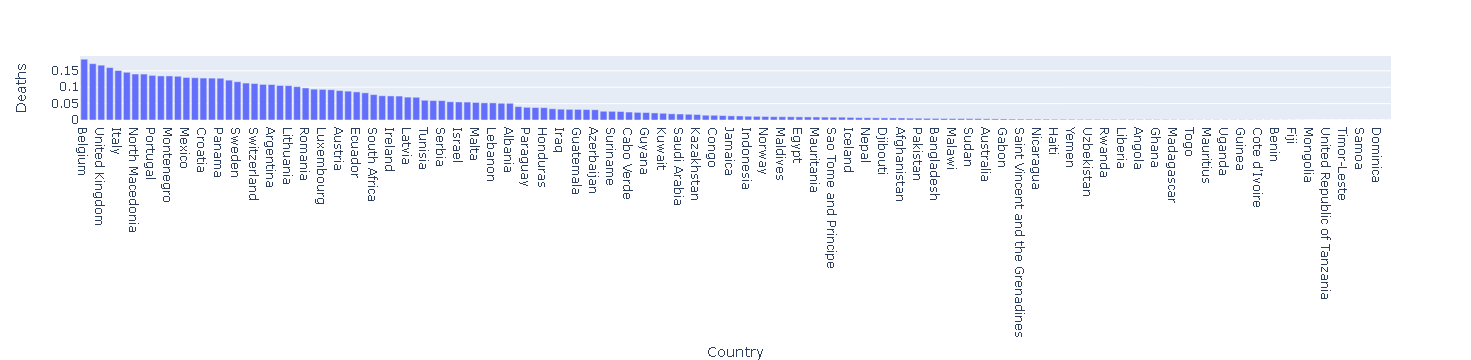

In [33]:
# Figure to present the Death rates of each country, sorted in descending order

fig = px.bar(food_df, x='Country', y='Deaths').update_xaxes(categoryorder="total descending")
fig.show()

In [34]:
food_df['Deaths'].describe()

count    154.000000
mean       0.039882
std        0.049285
min        0.000000
25%        0.002086
50%        0.012576
75%        0.069680
max        0.185428
Name: Deaths, dtype: float64

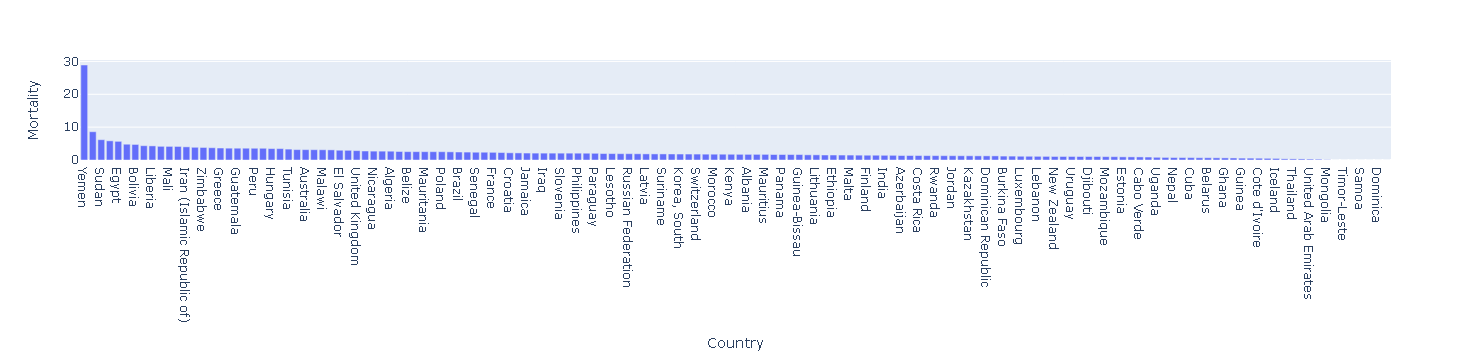

In [ ]:
# Figure to present the Mortality rates of each country, sorted in descending order

fig = px.bar(food_df, x='Country', y='Mortality').update_xaxes(categoryorder="total descending")
fig.show()

In [ ]:
food_df['Mortality'].describe()

count    154.000000
mean       2.136832
std        2.555027
min        0.000000
25%        1.074886
50%        1.737793
75%        2.541429
max       28.913963
Name: Mortality, dtype: float64

## *EDA #2* - Correlation of Obesity, Mortality, and Deaths
insert details

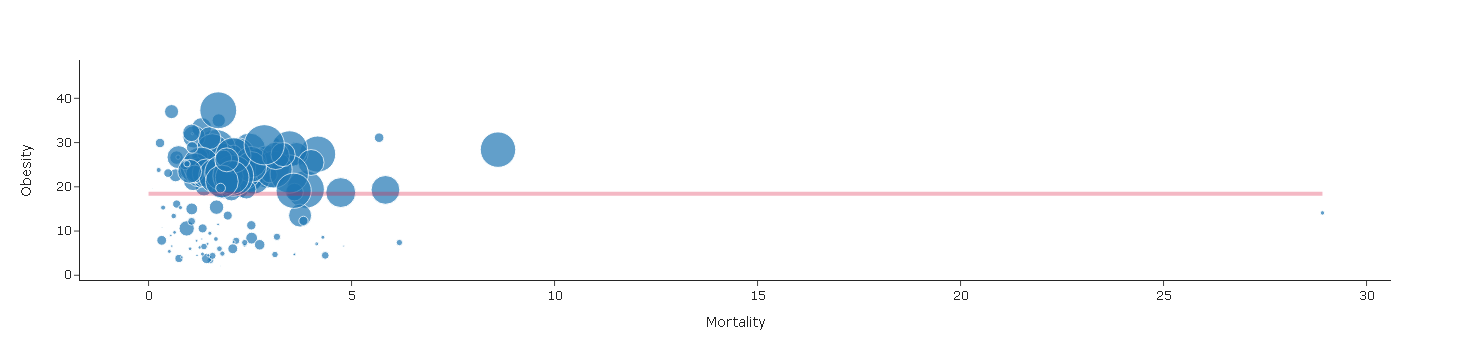

In [ ]:
# Figure to present the relationship between Obesity and Mortality 
# (with each point representing a country and the varying sizes of each point 
# representing the country's corresponding death rate)

fig = px.scatter(food_df, x="Mortality", y = "Obesity", size = "Deaths", hover_name='Country', log_x=False,
                 size_max=30, template="simple_white")

fig.add_shape(
    # Line Horizontal   
    type="line",
    x0=0,
    y0 = food_df['Obesity'].mean(),
    x1 = food_df['Mortality'].max(),
    y1 = food_df['Obesity'].mean(),
    line=dict(
        color="crimson",
        width=4
    ),
)

fig.show()

explain visualization

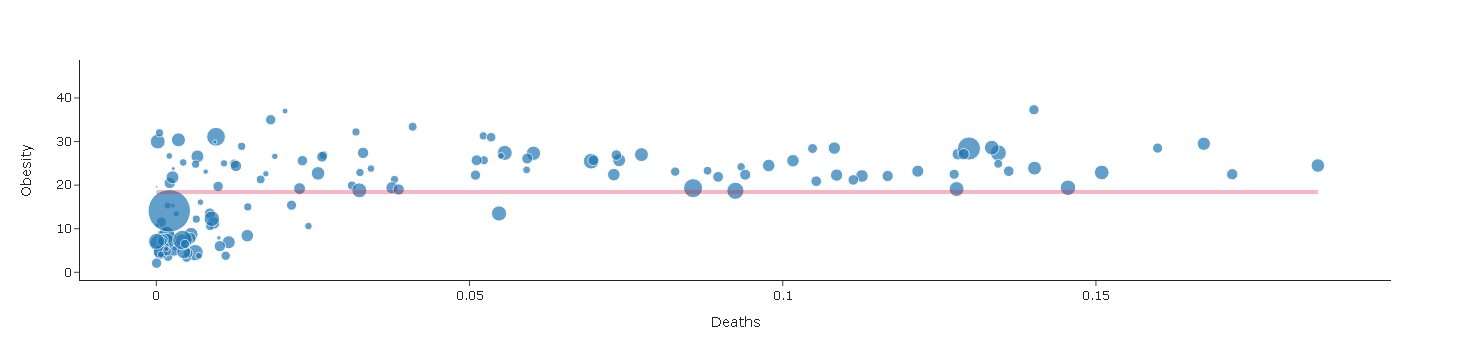

In [41]:
fig = px.scatter(food_df, x="Deaths", y = "Obesity", size = "Mortality", hover_name='Country', log_x=False,
                 size_max=30, template="simple_white")

fig.add_shape(
        # Line Horizontal
            type="line",
            x0=0,
            y0=food_df['Obesity'].mean(),
            x1=food_df['Deaths'].max(),
            y1=food_df['Obesity'].mean(),
            line=dict(
                color="crimson",
                width=4
            ),
    )

fig.show()
a,b = stats.pearsonr(food_df['Deaths'].values, food_df['Obesity'].values)

## *EDA #3* - Correlation of Undernourished, Mortality, and Deaths
insert details

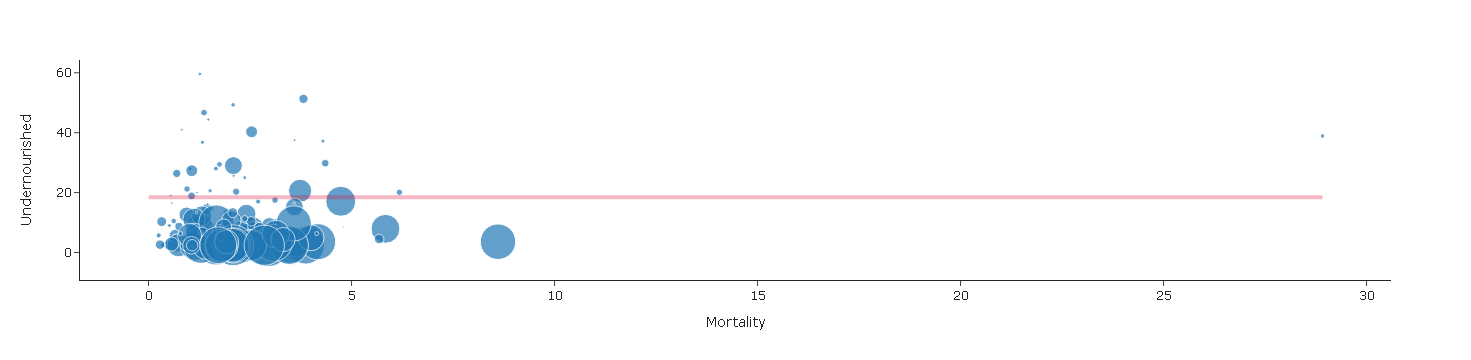

In [ ]:
# Figure to present the relationship between Undernourished and Mortality 
# (with each point representing a country and the varying sizes of each point 
# representing the country's corresponding death rate)

fig = px.scatter(food_df, x="Mortality", y = "Undernourished", size = "Deaths", hover_name='Country', log_x=False,
                 size_max=30, template="simple_white")

fig.add_shape(
    # Line Horizontal   
    type="line",
    x0=0,
    y0 = food_df['Obesity'].mean(),
    x1 = food_df['Mortality'].max(),
    y1 = food_df['Obesity'].mean(),
    line=dict(
        color="crimson",
        width=4
    ),
)

fig.show()

explain visualization

verbose textual descriptions of your procedures and findings for EDA

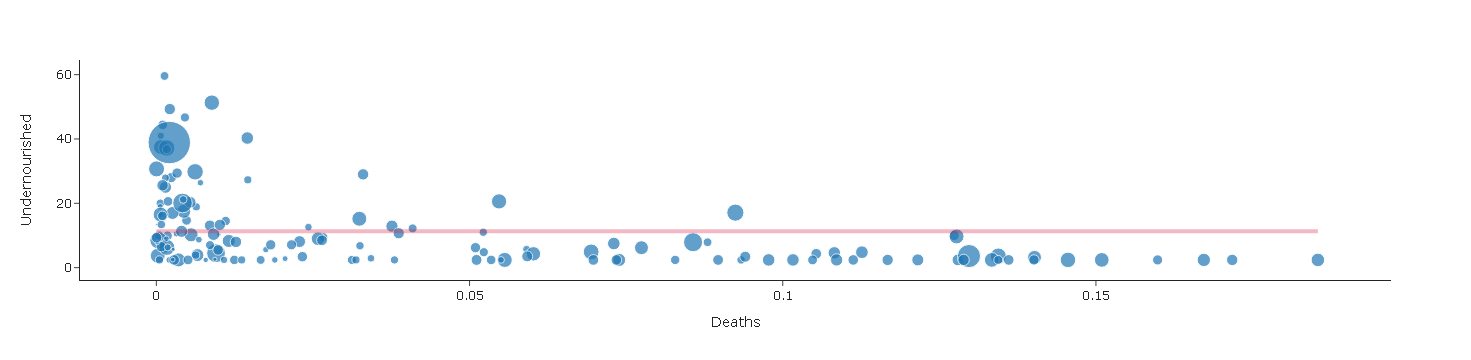

In [40]:
fig = px.scatter(food_df, x="Deaths", y = "Undernourished", size = "Mortality", hover_name='Country', log_x=False,
                 size_max=30, template="simple_white")

fig.add_shape(
        # Line Horizontal
            type="line",
            x0=0,
            y0=food_df['Undernourished'].mean(),
            x1=food_df['Deaths'].max(),
            y1=food_df['Undernourished'].mean(),
            line=dict(
                color="crimson",
                width=4
            ),
    )

fig.show()
a,b = stats.pearsonr(food_df['Deaths'].values, food_df['Undernourished'].values)

# IV. Research Question
insert details

## Can we categorize the health of countries based on their obesity, undernourished, deaths, and mortality rates?

explanation regarding the connection of the research question to the answers obtained from performing exploratory data analysis

importance and significance of the research question